<a href="https://colab.research.google.com/github/2coffeeboi2/CODSOFT/blob/main/CODSOFT_INTERNSHIP_Task_1_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# CODSOFT INTERNSHIP**
# **# Task 1: Predicting Titanic Survival**
# **# Author: Aab El Roi**
# **# Field: Data Science**
# **# Batch: September 2024**

# **AIM**

# **The primary aim of this project is to develop an interactive web application that predicts the likelihood of survival for passengers on the Titanic based on various personal and voyage-related features. Utilizing machine learning algorithms and a pre-trained model, this application provides users with real-time predictions and insights into the survival probability of individuals given specific input parameters.**

# 1: Load and Prepare the Data

In [ ]:
import pandas as pd

# Load the dataset
titanic_df = pd.read_csv('/content/drive/MyDrive/CODSOFT Internship/TASK 1/Titanic-Dataset.csv')

# Drop irrelevant columns
titanic_df = titanic_df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

# Convert 'Sex' to numeric values
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

# Handle missing values in 'Embarked' with the most common value
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Define features and target variable
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

# Display the first few rows of the dataset
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


# 2: Define Preprocessing and Model

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Define preprocessing for numeric and categorical features
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# 3: Split Data and Train Model

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model (optional, for your reference)
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8060


#4: Plot Confusion Matrix

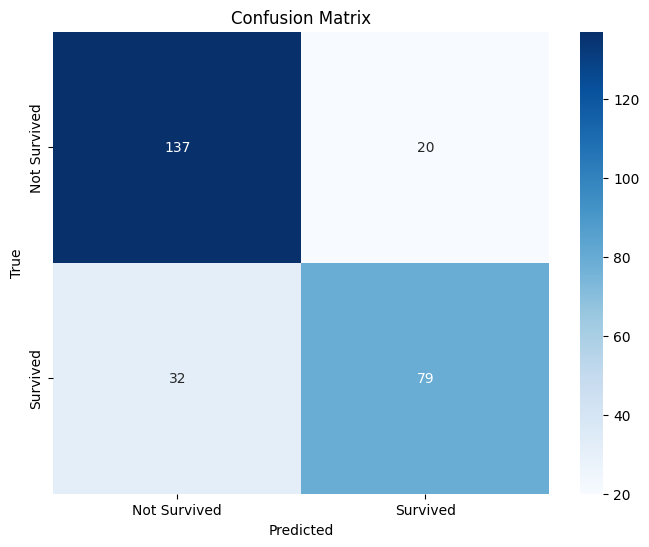

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 5: Plot ROC Curve

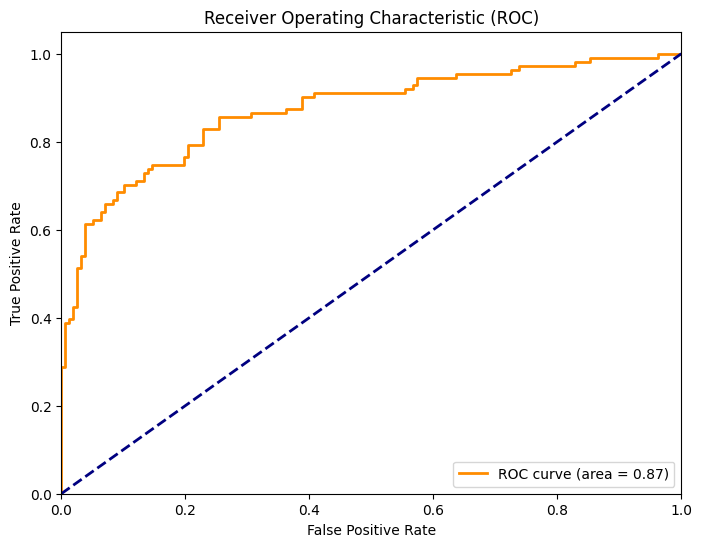

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get probabilities
y_prob = model.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# 6: Save the Model

In [ ]:
import pickle

# Save the fitted model and preprocessor
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model training complete and saved as 'model.pkl'.")

Model training complete and saved as 'model.pkl'.
